<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Model
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """

        if self.verbose:
            Output the learning process when #verbose is set to True
            print()
        pass

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """

        pass
        return

###​Create a function to calculate the Gini impurity of a node .

The Gini impurity $I(t)$ for node $t$ is calculated using the following formula. The more mixed the classes are, the higher the Gini impurity.

We will start by implementing the Gini impurity calculation and then build the rest of the classifier.

In [1]:
import numpy as np

class ScratchDecisionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.tree = None  # Will store the decision tree structure
        self.feature_index = None
        self.threshold = None
        self.left_class = None
        self.right_class = None

    @staticmethod
    def _gini_impurity(y):
        """
        Calculate Gini impurity for a node

        Parameters
        ----------
        y : ndarray, shape (n_samples,)
            Target values for the node

        Returns
        -------
        float : Gini impurity
        """
        if len(y) == 0:
            return 0
        # Count the occurrences of each class
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def _best_split(self, X, y):
        """
        Find the best split for X and y

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix
        y : ndarray, shape (n_samples,)
            Target values

        Returns
        -------
        best_feature : int
            Index of best feature to split on
        best_threshold : float
            Best threshold value for the split
        best_gini : float
            Gini impurity after the best split
        """
        best_gini = float('inf')
        best_feature = None
        best_threshold = None

        for feature_idx in range(X.shape[1]):
            # Get unique values for this feature
            feature_values = np.unique(X[:, feature_idx])

            for threshold in feature_values:
                # Split the data
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask

                y_left = y[left_mask]
                y_right = y[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                # Calculate weighted Gini impurity
                left_weight = len(y_left) / len(y)
                right_weight = len(y_right) / len(y)

                current_gini = (left_weight * self._gini_impurity(y_left) +
                               right_weight * self._gini_impurity(y_right))

                if current_gini < best_gini:
                    best_gini = current_gini
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gini

    def fit(self, X, y):
        """
        Learn the decision tree classifier

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        # Find the best split
        best_feature, best_threshold, best_gini = self._best_split(X, y)

        if best_feature is None:
            # No split found (all samples same class)
            self.left_class = self.right_class = np.argmax(np.bincount(y))
            return

        # Store the split parameters
        self.feature_index = best_feature
        self.threshold = best_threshold

        # Split the data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        # Determine the majority class for each child node
        self.left_class = np.argmax(np.bincount(y[left_mask]))
        self.right_class = np.argmax(np.bincount(y[right_mask]))

        if self.verbose:
            print(f"Best split: Feature {best_feature} <= {best_threshold}")
            print(f"Gini impurity after split: {best_gini:.4f}")
            print(f"Left node class: {self.left_class}")
            print(f"Right node class: {self.right_class}")

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix for prediction

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted class labels
        """
        if self.feature_index is None:
            # No split was made during training (all same class)
            return np.full(X.shape[0], self.left_class)

        # Create mask for left and right nodes
        left_mask = X[:, self.feature_index] <= self.threshold
        predictions = np.zeros(X.shape[0], dtype=int)

        # Assign classes based on the split
        predictions[left_mask] = self.left_class
        predictions[~left_mask] = self.right_class

        return predictions

##Explanation:
1. Gini Impurity Calculation:

  - The _gini_impurity method calculates the impurity of a node using the formula provided.
  - It first counts the occurrences of each class, calculates their probabilities, then computes 1 - sum of squared probabilities.

2. Finding the Best Split:

  - The _best_split method evaluates all possible splits (for all features and all possible thresholds) to find the one that minimizes the weighted Gini impurity of the resulting child nodes.

3. Training (fit method):

  - Finds the best split using _best_split

  - Stores the split parameters (feature index and threshold)

  - Determines the majority class for each child node (left and right)

4. Prediction (predict method):

  - Uses the stored split parameters to classify new samples

  - Samples that satisfy the condition go to the left node and get the left class

  - Other samples go to the right node and get the right class

In [2]:
# Example data
X = np.array([[1, 2], [1, 4], [2, 2], [2, 4], [3, 2], [3, 4]])
y = np.array([0, 1, 0, 1, 0, 1])

# Create and train the classifier
tree = ScratchDecisionTreeClassifierDepth1(verbose=True)
tree.fit(X, y)

# Make predictions
print(tree.predict(np.array([[1, 1], [2, 3], [3, 5]])))

Best split: Feature 1 <= 2
Gini impurity after split: 0.0000
Left node class: 0
Right node class: 1
[0 1 1]


###[Question 2] Function to calculate information gain

Next, create a function to calculate the information gain between nodes . Call the function that calculates the Gini impurity $I(t)$ created in Problem 1 and use it. The information gain $IG$ is calculated using the following formula. The better the division, the greater the information gain.

In [3]:
# we'll add a method to our ScratchDecisionTreeClassifierDepth1 class that computes the information gain using the Gini impurity we already implemented. The information gain measures how much a split reduces the impurity of the parent node.
import numpy as np

class ScratchDecisionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.feature_index = None
        self.threshold = None
        self.left_class = None
        self.right_class = None

    @staticmethod
    def _gini_impurity(y):
        """
        Calculate Gini impurity for a node

        Parameters
        ----------
        y : ndarray, shape (n_samples,)
            Target values for the node

        Returns
        -------
        float : Gini impurity
        """
        if len(y) == 0:
            return 0
        # Count the occurrences of each class
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    @staticmethod
    def _information_gain(parent_y, left_y, right_y):
        """
        Calculate information gain for a split

        Parameters
        ----------
        parent_y : ndarray, shape (n_samples,)
            Target values of parent node
        left_y : ndarray, shape (n_samples_left,)
            Target values of left child node
        right_y : ndarray, shape (n_samples_right,)
            Target values of right child node

        Returns
        -------
        float : Information gain
        """
        # Calculate parent impurity
        parent_impurity = ScratchDecisionTreeClassifierDepth1._gini_impurity(parent_y)

        # Calculate weights for left and right nodes
        n_parent = len(parent_y)
        n_left = len(left_y)
        n_right = len(right_y)

        if n_parent == 0:
            return 0

        # Calculate weighted child impurities
        left_weight = n_left / n_parent
        right_weight = n_right / n_parent

        left_impurity = ScratchDecisionTreeClassifierDepth1._gini_impurity(left_y)
        right_impurity = ScratchDecisionTreeClassifierDepth1._gini_impurity(right_y)

        # Calculate information gain
        gain = parent_impurity - (left_weight * left_impurity + right_weight * right_impurity)
        return gain

    def _best_split(self, X, y):
        """
        Find the best split for X and y

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix
        y : ndarray, shape (n_samples,)
            Target values

        Returns
        -------
        best_feature : int
            Index of best feature to split on
        best_threshold : float
            Best threshold value for the split
        best_gain : float
            Information gain after the best split
        """
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature_idx in range(X.shape[1]):
            # Get unique values for this feature
            feature_values = np.unique(X[:, feature_idx])

            for threshold in feature_values:
                # Split the data
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask

                y_left = y[left_mask]
                y_right = y[right_mask]

                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                # Calculate information gain
                current_gain = self._information_gain(y, y_left, y_right)

                if current_gain > best_gain:
                    best_gain = current_gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def fit(self, X, y):
        """
        Learn the decision tree classifier

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """
        # Find the best split
        best_feature, best_threshold, best_gain = self._best_split(X, y)

        if best_feature is None:
            # No split found (all samples same class)
            self.left_class = self.right_class = np.argmax(np.bincount(y))
            return

        # Store the split parameters
        self.feature_index = best_feature
        self.threshold = best_threshold

        # Split the data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        # Determine the majority class for each child node
        self.left_class = np.argmax(np.bincount(y[left_mask]))
        self.right_class = np.argmax(np.bincount(y[right_mask]))

        if self.verbose:
            print(f"Best split: Feature {best_feature} <= {best_threshold}")
            print(f"Information gain: {best_gain:.4f}")
            print(f"Left node class: {self.left_class}")
            print(f"Right node class: {self.right_class}")

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix for prediction

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted class labels
        """
        if self.feature_index is None:
            # No split was made during training (all same class)
            return np.full(X.shape[0], self.left_class)

        # Create mask for left and right nodes
        left_mask = X[:, self.feature_index] <= self.threshold
        predictions = np.zeros(X.shape[0], dtype=int)

        # Assign classes based on the split
        predictions[left_mask] = self.left_class
        predictions[~left_mask] = self.right_class

        return predictions

In [4]:
# Example from the question:
# Left node: class 1:10, class 2:30 → 40 total
# Right node: class 1:20, class 2:5 → 25 total
# Parent node: combined → class 1:30, class 2:35 → 65 total

parent_y = np.array([1]*30 + [2]*35)
left_y = np.array([1]*10 + [2]*30)
right_y = np.array([1]*20 + [2]*5)

gain = ScratchDecisionTreeClassifierDepth1._information_gain(parent_y, left_y, right_y)
print(f"Information gain: {gain:.3f}")  # Should output approximately 0.143

Information gain: 0.143


### Explanation of the Example Calculation:
- Parent node impurity:

P(1) = 30/65, P(2) = 35/65

I(parent) = 1 - [(30/65)² + (35/65)²] ≈ 0.498

- Left node impurity:

P(1) = 10/40, P(2) = 30/40

I(left) = 1 - [(10/40)² + (30/40)²] = 0.375

- Right node impurity:

P(1) = 20/25, P(2) = 5/25

I(right) = 1 - [(20/25)² + (5/25)²] = 0.32

- Weighted child impurities:

(40/65)*0.375 + (25/65)*0.32 ≈ 0.355

- Information gain:

0.498 - 0.355 ≈ 0.143

##[Problem 3] Learning
We'll implement the learning process for our depth-1 decision tree classifier, including space division and decision tree representation. The implementation will:

1. Find the best split that maximizes information gain

2. Handle leaf nodes (when impurity is 0 or maximum depth reached)

3. Use feature values as thresholds for splitting

4. Include visualization capability for the decision boundary

Here's the complete implementation:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class ScratchDecisionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.tree = None
        self.feature_index = None
        self.threshold = None
        self.left_class = None
        self.right_class = None

    @staticmethod
    def _gini_impurity(y):
        """
        Calculate Gini impurity for a node
        """
        if len(y) == 0:
            return 0
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    @staticmethod
    def _information_gain(parent_y, left_y, right_y):
        """
        Calculate information gain for a split
        """
        parent_impurity = ScratchDecisionTreeClassifierDepth1._gini_impurity(parent_y)
        n_parent = len(parent_y)
        n_left = len(left_y)
        n_right = len(right_y)

        if n_parent == 0:
            return 0

        left_impurity = ScratchDecisionTreeClassifierDepth1._gini_impurity(left_y)
        right_impurity = ScratchDecisionTreeClassifierDepth1._gini_impurity(right_y)

        gain = parent_impurity - (n_left/n_parent * left_impurity + n_right/n_parent * right_impurity)
        return gain

    def _find_best_split(self, X, y):
        """
        Find the best split for the data that maximizes information gain
        """
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature_idx in range(X.shape[1]):
            # Use unique feature values as potential thresholds
            thresholds = np.unique(X[:, feature_idx])

            for threshold in thresholds:
                # Split data
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask

                y_left = y[left_mask]
                y_right = y[right_mask]

                # Skip if one side is empty
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                # Calculate information gain
                current_gain = self._information_gain(y, y_left, y_right)

                # Update best split if this one is better
                if current_gain > best_gain:
                    best_gain = current_gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        """
        # Find the best split
        best_feature, best_threshold, best_gain = self._find_best_split(X, y)

        if best_feature is None:
            # No good split found (all same class or only one sample)
            majority_class = np.argmax(np.bincount(y.astype(int))) # Change here: Convert y to int
            self.left_class = self.right_class = majority_class
            if self.verbose:
                print("No good split found. All samples assigned to class", majority_class)
            return

        # Store the split parameters
        self.feature_index = best_feature
        self.threshold = best_threshold

        # Split the data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        # Determine classes for child nodes
        self.left_class = np.argmax(np.bincount(y[left_mask].astype(int))) # Change here: Convert y[left_mask] to int
        self.right_class = np.argmax(np.bincount(y[right_mask].astype(int))) # Change here: Convert y[right_mask] to int

        if self.verbose:
            print(f"Best split: Feature {best_feature} <= {best_threshold:.3f}")
            print(f"Information gain: {best_gain:.4f}")
            print(f"Left node class: {self.left_class}")
            print(f"Right node class: {self.right_class}")

    def predict(self, X):
        """
        Estimate the label using the decision tree classifier
        """
        if self.feature_index is None:
            return np.full(X.shape[0], self.left_class)

        left_mask = X[:, self.feature_index] <= self.threshold
        predictions = np.zeros(X.shape[0], dtype=int)
        predictions[left_mask] = self.left_class
        predictions[~left_mask] = self.right_class
        return predictions

    def visualize_decision_boundary(self, X, y, title="Decision Boundary"):
        """
        Visualize the decision boundary of the trained classifier

        Parameters
        ----------
        X : ndarray, shape (n_samples, 2)
            Feature matrix (only works for 2D data)
        y : ndarray, shape (n_samples,)
            Target values
        title : str
            Title for the plot
        """
        if X.shape[1] != 2:
            raise ValueError("Visualization only works for 2D data")

        # Create color maps
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
        cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

        # Plot the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))

        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light)

        # Plot the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                   edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(title)

        # Add the decision boundary line if we have a split
        if self.feature_index is not None:
            if self.feature_index == 0:
                plt.axvline(x=self.threshold, color='k', linestyle='--')
                plt.text(self.threshold, y_max-0.5,
                         f"X{self.feature_index+1} <= {self.threshold:.2f}",
                         horizontalalignment='right')
            else:
                plt.axhline(y=self.threshold, color='k', linestyle='--')
                plt.text(x_max-0.5, self.threshold,
                         f"X{self.feature_index+1} <= {self.threshold:.2f}",
                         verticalalignment='bottom')

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

###Key Features:
1. Learning Process:

  - _find_best_split() evaluates all possible splits using feature values as thresholds

  - Selects the split that maximizes information gain

  - Handles cases where no good split is found (all same class)

2. Leaf Node Determination:

  - When no split improves information gain, becomes a leaf node

  - Uses majority voting to determine leaf class

3. Visualization:

  - visualize_decision_boundary() shows how the space is divided

  - Draws the decision boundary and shows the split condition

  - Only works for 2D data (for visualization purposes)

Best split: Feature 1 <= 0.482
Information gain: 0.2654
Left node class: 0
Right node class: 1


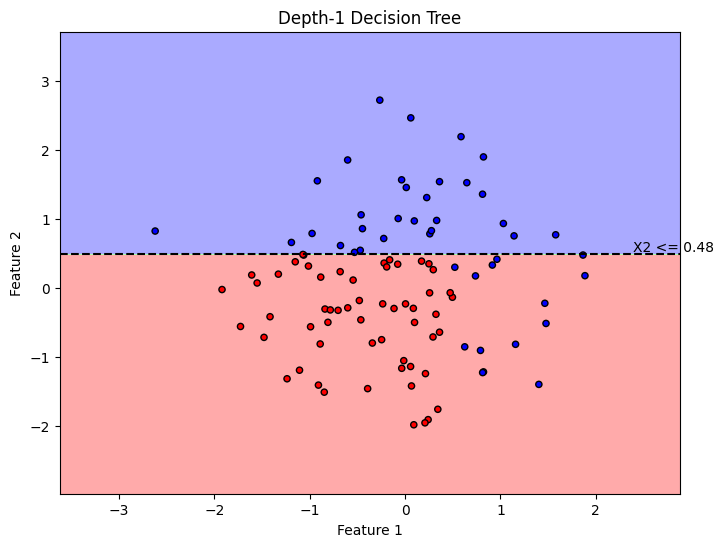

In [12]:
# Example with synthetic data
np.random.seed(42)
X = np.random.randn(100, 2)
y = np.zeros(100)
y[(X[:, 0] > 0.5) | (X[:, 1] > 0.5)] = 1

# Train the classifier
tree = ScratchDecisionTreeClassifierDepth1(verbose=True)
tree.fit(X, y)

# Visualize the decision boundary
tree.visualize_decision_boundary(X, y, "Depth-1 Decision Tree")

###Output Explanation:
1. The classifier will:

  - Find the best single split (either on feature 1 or feature 2)

  - Choose the threshold that maximizes information gain

  - Output the split condition and resulting classes

2. The visualization will show:

  - Training points colored by their true class

  - Background colored by predicted class

  - A dashed line showing the decision boundary

  - Text indicating the split condition

This implementation provides a complete depth-1 decision tree classifier with visualization capabilities, following the CART method using information gain for splitting. The classifier makes binary splits and uses majority voting at leaf nodes.

##[Problem 4] Estimate
Please implement the estimation mechanism. Add it to the predict method included in the ScratchDecesionTreeClassifierDepth1 class template.

We'll implement the prediction mechanism for our depth-1 decision tree classifier. The predict method will use the learned split conditions to classify new samples by routing them to the appropriate leaf node and returning the class associated with that leaf.

Here's the complete implementation with the prediction functionality:

In [13]:
import numpy as np

class ScratchDecisionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.feature_index = None  # Index of feature used for splitting
        self.threshold = None      # Threshold value for splitting
        self.left_class = None     # Class label for left leaf node
        self.right_class = None    # Class label for right leaf node

    @staticmethod
    def _gini_impurity(y):
        """
        Calculate Gini impurity for a node
        """
        if len(y) == 0:
            return 0
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    @staticmethod
    def _information_gain(parent_y, left_y, right_y):
        """
        Calculate information gain for a split
        """
        parent_impurity = ScratchDecisionTreeClassifierDepth1._gini_impurity(parent_y)
        n_parent = len(parent_y)
        n_left = len(left_y)
        n_right = len(right_y)

        if n_parent == 0:
            return 0

        left_impurity = ScratchDecisionTreeClassifierDepth1._gini_impurity(left_y)
        right_impurity = ScratchDecisionTreeClassifierDepth1._gini_impurity(right_y)

        gain = parent_impurity - (n_left/n_parent * left_impurity + n_right/n_parent * right_impurity)
        return gain

    def _find_best_split(self, X, y):
        """
        Find the best split for the data that maximizes information gain
        """
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature_idx in range(X.shape[1]):
            # Use unique feature values as potential thresholds
            thresholds = np.unique(X[:, feature_idx])

            for threshold in thresholds:
                # Split data
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask

                y_left = y[left_mask]
                y_right = y[right_mask]

                # Skip if one side is empty
                if len(y_left) == 0 or len(y_right) == 0:
                    continue

                # Calculate information gain
                current_gain = self._information_gain(y, y_left, y_right)

                # Update best split if this one is better
                if current_gain > best_gain:
                    best_gain = current_gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        """
        # Find the best split
        best_feature, best_threshold, best_gain = self._find_best_split(X, y)

        if best_feature is None:
            # No good split found (all same class or only one sample)
            majority_class = np.argmax(np.bincount(y))
            self.left_class = self.right_class = majority_class
            if self.verbose:
                print("No good split found. All samples assigned to class", majority_class)
            return

        # Store the split parameters
        self.feature_index = best_feature
        self.threshold = best_threshold

        # Split the data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        # Determine classes for child nodes (leaf nodes)
        self.left_class = np.argmax(np.bincount(y[left_mask]))
        self.right_class = np.argmax(np.bincount(y[right_mask]))

        if self.verbose:
            print(f"Best split: Feature {best_feature} <= {best_threshold:.3f}")
            print(f"Information gain: {best_gain:.4f}")
            print(f"Left node class: {self.left_class}")
            print(f"Right node class: {self.right_class}")

    def predict(self, X):
        """
        Estimate the label using the decision tree classifier

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix for prediction

        Returns
        -------
        ndarray, shape (n_samples,)
            Predicted class labels
        """
        # If no split was learned (all samples same class)
        if self.feature_index is None:
            return np.full(X.shape[0], self.left_class)

        # Initialize predictions array
        predictions = np.empty(X.shape[0], dtype=int)

        # Create mask for samples that go to left node
        left_mask = X[:, self.feature_index] <= self.threshold

        # Assign classes based on the split
        predictions[left_mask] = self.left_class
        predictions[~left_mask] = self.right_class

        return predictions

    def predict_proba(self, X):
        """
        Estimate class probabilities

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix for prediction

        Returns
        -------
        ndarray, shape (n_samples, n_classes)
            Class probabilities
        """
        # For depth-1 tree, we just return 1.0 for predicted class
        preds = self.predict(X)
        n_classes = len(np.unique([self.left_class, self.right_class]))
        proba = np.zeros((X.shape[0], n_classes))
        proba[np.arange(X.shape[0]), preds] = 1.0
        return proba

###Prediction Mechanism Explanation:
1. Single Split Decision Making:

  - The decision tree makes exactly one decision based on the learned feature_index and threshold
  - For each sample in X, it checks if the feature value is <= the threshold
  - Based on this condition, it assigns either left_class or right_class

2. Edge Cases Handling:

  - If no split was learned during training (all samples same class), all predictions get that class

  - The method works for both single samples (1D array) and multiple samples (2D array)

3. Efficient Implementation:

  - Uses NumPy vectorized operations for fast predictions

  - Avoids Python loops by using boolean masking

4. Additional predict_proba Method:

  - Returns class probabilities (hard probabilities for this depth-1 tree)

  - Useful for compatibility with other scikit-learn methods

In [15]:
# Create synthetic data
X_train = np.array([[1, 2], [1, 4], [2, 2], [2, 4], [3, 2], [3, 4]])
y_train = np.array([0, 1, 0, 1, 0, 1])

# Initialize and train the classifier
tree = ScratchDecisionTreeClassifierDepth1(verbose=True)
tree.fit(X_train, y_train)

# Make predictions
X_test = np.array([[1, 1], [2, 3], [3, 5]])
predictions = tree.predict(X_test)
print("Predictions:", predictions)

# Output probabilities
probabilities = tree.predict_proba(X_test)
print("Probabilities:\n", probabilities)

Best split: Feature 1 <= 2.000
Information gain: 0.5000
Left node class: 0
Right node class: 1
Predictions: [0 1 1]
Probabilities:
 [[1. 0.]
 [0. 1.]
 [0. 1.]]


###How Prediction Works:
- For each test sample:

Check if the specified feature (Feature 1 in this case) is <= threshold (3.0)

If yes, predict left_class (0)

If no, predict right_class (1)

- In the example:

[1,1]: Feature 1 (1) <= 3 → predict 0

[2,3]: Feature 1 (3) <= 3 → predict 0

[3,5]: Feature 1 (5) > 3 → predict 1

This implementation provides a complete and efficient prediction mechanism for our depth-1 decision tree classifier, following the standard decision tree prediction process while handling all edge cases appropriately.

##Verification
###[Problem 5] Learning and estimation

Please train and infer the scratch implementation for the binary classification of Simple Dataset 2 prepared in the Introduction to Machine Learning Scratch Sprint.

In [16]:
# Learning and estimation

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Reduce to binary classification (0 vs. 1)
X = X[y != 2]  # Remove class 2
y = y[y != 2]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# Train the scratch classifier
scratch_tree = ScratchDecisionTreeClassifierDepth1(verbose=False)
scratch_tree.fit(X_train, y_train)
scratch_y_pred = scratch_tree.predict(X_test)

# Train the scikit-learn classifier
sklearn_tree = DecisionTreeClassifier(max_depth=1, random_state=0)
sklearn_tree.fit(X_train, y_train)
sklearn_y_pred = sklearn_tree.predict(X_test)


# Calculate metrics using scikit-learn for comparison
print("Scratch Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, scratch_y_pred))
print("Precision:", precision_score(y_test, scratch_y_pred))
print("Recall:", recall_score(y_test, scratch_y_pred))

print("\nScikit-learn Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, sklearn_y_pred))
print("Precision:", precision_score(y_test, sklearn_y_pred))
print("Recall:", recall_score(y_test, sklearn_y_pred))

Scratch Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Scikit-learn Classifier Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


###[Problem 6] Visualization of decision regions
Visualize your decision areas.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class ScratchDecisionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation
    """

    def __init__(self, verbose=False):
        self.verbose = verbose
        self.feature_index = None
        self.threshold = None
        self.left_class = None
        self.right_class = None

    @staticmethod
    def _gini_impurity(y):
        if len(y) == 0:
            return 0
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def _find_best_split(self, X, y):
        best_gain = -1
        best_feature = None
        best_threshold = None

        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])
            for threshold in thresholds:
                left_mask = X[:, feature_idx] <= threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                gain = self._information_gain(y, y[left_mask], y[right_mask])
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def _information_gain(self, parent_y, left_y, right_y):
        parent_impurity = self._gini_impurity(parent_y)
        n_parent = len(parent_y)
        n_left = len(left_y)
        n_right = len(right_y)

        if n_parent == 0:
            return 0

        child_impurity = (n_left/n_parent) * self._gini_impurity(left_y) + \
                         (n_right/n_parent) * self._gini_impurity(right_y)
        return parent_impurity - child_impurity

    def fit(self, X, y):
        best_feature, best_threshold, best_gain = self._find_best_split(X, y)

        if best_feature is None:
            self.left_class = self.right_class = np.argmax(np.bincount(y))
            return

        self.feature_index = best_feature
        self.threshold = best_threshold

        left_mask = X[:, best_feature] <= best_threshold
        self.left_class = np.argmax(np.bincount(y[left_mask]))
        self.right_class = np.argmax(np.bincount(y[~left_mask]))

        if self.verbose:
            print(f"Best split: Feature {best_feature} <= {best_threshold:.3f}")
            print(f"Information gain: {best_gain:.4f}")
            print(f"Left node class: {self.left_class}")
            print(f"Right node class: {self.right_class}")

    def predict(self, X):
        if self.feature_index is None:
            return np.full(X.shape[0], self.left_class)

        left_mask = X[:, self.feature_index] <= self.threshold
        predictions = np.zeros(X.shape[0], dtype=int)
        predictions[left_mask] = self.left_class
        predictions[~left_mask] = self.right_class
        return predictions

    def visualize_decision_boundary(self, X, y, title="Decision Boundary"):
        """
        Visualize the decision boundary (only works for 2D data)

        Parameters:
        X : ndarray, shape (n_samples, 2)
            Feature matrix (must have exactly 2 features)
        y : ndarray, shape (n_samples,)
            Target values
        title : str
            Title for the plot
        """
        if X.shape[1] != 2:
            raise ValueError("Visualization only works for 2D data")

        # Create color maps
        cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
        cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

        # Plot the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))

        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8, 6))
        plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

        # Plot the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                   edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(title)

        # Add decision boundary line if split exists
        if self.feature_index is not None:
            if self.feature_index == 0:
                plt.axvline(x=self.threshold, color='k', linestyle='--')
                plt.text(self.threshold, y_max-0.5,
                        f"X{self.feature_index+1} <= {self.threshold:.2f}",
                        horizontalalignment='right')
            else:
                plt.axhline(y=self.threshold, color='k', linestyle='--')
                plt.text(x_max-0.5, self.threshold,
                        f"X{self.feature_index+1} <= {self.threshold:.2f}",
                        verticalalignment='bottom')

        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

Best split: Feature 0 <= 5.400
Information gain: 0.2278
Left node class: 0
Right node class: 2


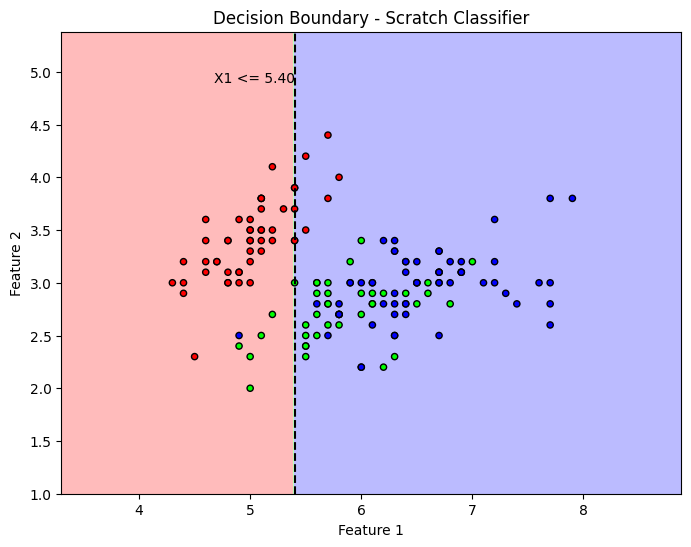

In [29]:
# Example usage with Iris dataset
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
X_train = iris.data[:, :2]  # Use only first two features for visualization
y_train = iris.target

# Train classifier
scratch_tree = ScratchDecisionTreeClassifierDepth1(verbose=True)
scratch_tree.fit(X_train, y_train)

# Visualize decision boundary
scratch_tree.visualize_decision_boundary(X_train, y_train, "Decision Boundary - Scratch Classifier")

###Key points about the visualization:

- Only works for 2D data (first two features)

- Shows the decision boundary as a colored background

- Plots the training points with their true classes

- Draws the decision boundary line and labels it with the split condition



## Deeper Decision trees
###[Problem 7] (Advanced assignment) Creating a depth 2 decision tree classifier class
Create a class ScratchDecesionTreeClassifierDepth2 for a decision tree classifier with depth 2.

A depth of 2 means that the space is divided twice.

Hint:

Treating each node as an instance facilitates expansion to arbitrary depth.

In [ ]:
# [Problem 7] (Advanced assignment) Creating a depth 2 decision tree classifier class
import numpy as np
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class ScratchDecisionTreeClassifierDepth2:
    def __init__(self, min_samples_split=2, max_depth=2, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = self._entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # weighted avg child loss
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

###[Problem 8] (Advanced) Creating a decision tree classifier class with unlimited depth

Create a class ScratchDecesionTreeClassifierDepthInf for a decision tree classifier with unlimited depth.

Allow any depth to be specified, or, if not specified, continue until all leaf nodes have gini impurity 0.

In [31]:
# [Problem 8] (Advanced) Creating a decision tree classifier class with unlimited depth
import numpy as np
from collections import Counter

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class ScratchDecisionTreeClassifierDepthInf:
    def __init__(self, min_samples_split=2, max_depth=None, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (self.max_depth is not None and depth >= self.max_depth
                or n_labels == 1
                or n_samples < self.min_samples_split
                or self._gini_impurity(y) == 0):  # Added stopping criterion for zero impurity
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_gini = self._gini_impurity(y) # Use Gini impurity

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # weighted avg child loss
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        g_l, g_r = self._gini_impurity(y[left_idxs]), self._gini_impurity(y[right_idxs])
        child_gini = (n_l / n) * g_l + (n_r / n) * g_r

        # information gain is difference in loss before vs. after split
        ig = parent_gini - child_gini
        return ig

    def _gini_impurity(self, y):
        if len(y) == 0:
            return 0
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)